# Predicting Sales Prices for Ames Dataset
by: Steve Diamond

## Problem Statement

Our data science team at the Ames Chamber of Commerce has been tasked to understand housing in and around the Ames area. Our goal is to understand which home features are the most important drivers of real estate prices and which are not important at all (paying close attention to those things that are typically assumed to be true).

We have obtained a dataset from the Assessor's office which was compiled by Dean De Cock at Truman State University. It includes 2,051 home sales in the area between 2006 and 2010. To analyze our data, will be regression modeling and judging our models using the RMSE metric. This metric allows us to translate our results into units (in this case dollars) and understand the direct impact of each feature.


## Executive Summary

Our team at the Ames Chamber of Commerce was tasked with looking a real estate sales dataset from the Ames area, understanding its implictions and making recommendations on how we can leverage this knowledge to the benefit of our members. 

To accomplish this task, we will do the following:

- Clean the data
- Perform an Exploratory Data Analysis to understand what we can from the data itself, add additional information through feature engineering and create a dataset that is completely numerical
- Apply multiple regression methods to determine which best suits this data
- Chose one of these methods, tune the model by varying the inputs and then examine the model

## Table of Contents

- [Loading Data](#Loading-Data)
- [Data Dictionary](#Data-Dictionary)
- [Data Cleaing](#Data-Cleaing)
- [Exploratory Data Analysis](#EDA)
- [Modeling](#Modeling)
- [Model Selection](#Model-Selection)
- [Model Tuning](#Model-Tuning)
- [Model Evaluation](#Model-Evaluation)
- [Conclusions and Recommendations](#Conclusion)


## Loading Data


In [1]:
import warnings
warnings.filterwarnings("ignore") # Shhhh
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.compose import TransformedTargetRegressor

# importing items needed for the Ridge Model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from regressors import stats

import statsmodels.api as sm
%matplotlib inline
RANDOM_STATE = 90210

In [2]:
df = pd.read_csv('../datasets/train.csv') 
# called train.csv but it our dataset

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
# Establish a function to reset index of a DataFrame if necessary
def reset_index(df):
# reset act data set index so Alabama row is now 0 in index
    df.reset_index(inplace = True)

# Drop 'index' row from the act data set - (created by last step)
    df.drop(columns = ['index'],inplace=True)

In [5]:
df.shape

(2051, 81)

## Data Dictionary

|**Feature Name**|**Data Type**|**Description**|
|:---|:---|:---|
|ms_subclass|Nominal|Type of dwelling|
|ms_zoning|Nominal|Zoning classification|
|lot_frontage|Continuous (Ft.)|Feet of street connected to property|
|lot_area|Continuous (Sq. Ft.)|Lot size|
|street|Nominal|Street Access|
|alley|Nominal|Alley Access|
|lot_shape|Ordinal|General shape of property|
|land_contour|Nominal|Flatness of the property|
|utilities|Ordinal|Type of utilities available|
|lot_config|Nominal|Lot configuration|
|land_slope|Ordinal|Slope of property|
|neighborhood|Nominal|Physical locations within Ames city limits|
|condition_1|Nominal|Proximity to various conditions|
|condition_2|Nominal|Proximity (if more than one is present)|
|bldg_type|Nominal|Type of dwelling|
|house_style|Nominal|Style of dwelling|
|overall_qual|Ordinal|Overall quality of house|
|overall_cond|Ordinal|Overall condition of house|
|year_built|Discrete|Original construction date|
|year_remod/add|Discrete|Remodel date (same as construction date if no remodeling or additions)|
|roof_style|Nominal|Type of roof|
|roof_matl|Nominal|Roofing material|
|exterior_1|Nominal|Exterior covering on house|
|exterior_2|Nominal|Exterior covering (if more than one material)|
|mas_vnr_type|Nominal|Masonry veneer type|
|mas_vnr_area|Continuous (Sq. Ft.)|Masonry veneer area|
|exter_qual|Ordinal|Quality of exterior material|
|exter_cond|Ordinal|Condition of exterior material|
|foundation|Nominal|Type of foundation|
|bsmt_qual|Ordinal|Quality of basement|
|bsmt_cond|Ordinal|Condition of basement|
|bsmt_exposure|Ordinal|Refers to walkout or garden level walls|
|bsmtfin_type_1|Ordinal|Rating of finished basement|
|bsmtfin_sf_1|Continuous (Sq. Ft.)|Tyoe 1 finished basement area|
|bsmtfin_type_2|Ordinal|Rating of finished basement (if multiple types)|
|bsmtfin_sf_2|Continuous (Sq. Ft.)|Tyoe 2 finished basement area|
|bsmt_unf_sf|Continuous (Sq. Ft.)|Unfinished basement area|
|total_bsmt_sf|Continuous (Sq. Ft.)|Total basement area|
|heating|Nominal|Type of heating|
|central_air|Nominal|Central air conditioning|
|electrical|Ordinal|Electrical system|
|1st_flr_sf|Continuous (Sq. Ft.)|First floor area|
|2nd_flr_sf|Continuous (Sq. Ft.)|Second floor area|
|low_qual_fin_sf|Continuous (Sq. Ft.)|Low quality finished area (all floors)|
|gr_liv_area|Continuous (Sq. Ft.)|Above grade (ground) living area|
|bsmt_full_bath|Discrete|Basement full bathrooms|
|bsmt_half_bath|Discrete|Basement half bathrooms|
|full_bath|Discrete|Full bathrooms above grade|
|half_bath|Discrete|Half baths above grade|
|bedroom|Discrete|Bedrooms above grade (does NOT include basement bedrooms)|
|kitchen|Discrete|Kitchens above grade|
|kitchenqual|Ordinal|Kitchen quality|
|totmmsabvgrd|Discrete|Total rooms above grade (does not include bathrooms)?
|functional|Ordinal|Home functionality (Assume typical unless deductions are warranted)|
|fireplaces|Discrete|Number of fireplaces|
|fireplace_qu|Ordinal|Fireplace quality|
|garage_type|Nominal|Garage location|
|garage_yr_blt|Discrete|Year garage was built|	
|garage_finish|Ordinal|Interior finish of the garage|
|garage_cars|Discrete|Size of garage in car capacity|
|garage_area|Continuous (Sq. Ft.)|Area of garage|
|garage_qual|Ordinal|Garage quality|
|garage_cond|Ordinal|Garage condition|
|paved_drive|Ordinal|Paved driveway|
|wood_deck_sf|Continuous (Sq. Ft.)|Wood deck area|
|open_porch_sf|Continuous (Sq. Ft.)|Open porch area|
|enclosed_porch|Continuous (Sq. Ft.)|Enclosed porch area|
|3ssn_porch|Continuous (Sq. Ft.)|Three season porch area|
|screen_porch|Continuous (Sq. Ft.)|Screen porch area|
|pool_area|Continuous (Sq. Ft.)|Pool area|
|pool_qc|Ordinal|Pool quality|
|fence|Ordinal|Fence quality|
|misc_feature|Nominal|Miscellaneous feature not covered in other categories|
|misc_val|Continuous (US Dollar)|Value of miscellaneous feature|
|mo_sold|Discrete|Month Sold (MM)|
|yr_sold|Discrete|Year Sold (YYYY)|
|sale_type|Nominal|Type of sale|
|sale_condition|Nominal|Condition of sale|
|saleprice|Continuous (US Dollar)|Sale price|

                                                                                                            

## Data Cleaning

In [6]:
# Convert all columns to lowercase and replace spaces in column names with underscores.
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
# Checking for duplicated columns - None found
df[df.duplicated()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


### Zoning Classification

Changing these entries to just read C, A and I to match what is in the data documentation.

In [8]:
df['ms_zoning'].value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: ms_zoning, dtype: int64

In [9]:
# For MS Zoning, changing those entries to just read C, A and I in the data. 
for i, item in enumerate(df['ms_zoning']):
    if item == 'C (all)':
        df['ms_zoning'][i] = 'C'
    elif item == 'A (agr)':
        df['ms_zoning'][i] = 'A'
    elif item == 'I (all)':
        df['ms_zoning'][i] = 'I'


### Missing Values

In [10]:
# Checking for Missing Values
df.isnull().sum()

id                    0
pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage        330
lot_area              0
street                0
alley              1911
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod/add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type         22
mas_vnr_area         22
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual            55
bsmt_cond            55
bsmt_exposure        58
bsmtfin_type_1       55
bsmtfin_sf_1          1
bsmtfin_type_2       56
bsmtfin_sf_2          1
bsmt_unf_sf           1
total_bsmt_sf         1
heating               0
heating_qc      

**Interpretation**

- There are some obvious groupings of missing data to explore.
    * Masonry Veneer
        - Type & Area both missing 22 values
    * Basement
        - Quality, Condition and Finish Rating #1 all missing 55 values
        - Finish Rating #2 missing 56 values and Exposure missing 58 
        - Finished Sq Ft #1, Finished Sq Ft #2, Uninished Sq Ft and Total Finished Sq Ft all missing 1 value
        - Full Bathrooms and Half Bathrooms both missing 2 values
    * Garage
        - Type missing 113 values while Year Built, Finish Type, Quality and Condition all missing 114
        - Car Capacity and Area both missing 1 value 
- Other missing values to look at:
    * Lot Frontage - 330 missing
    * Alley type - 1,911 missing
    * Fireplace Quality - 1,000 missing
    * Pool Quality - 2,042 missing
    * Fence Quality - 1,651 missing
    * Miscellaneous Feature - 1,986 missing

### Lot Frontage Missing Values
To impute values for Lot Frontage, we determined that lot_frontage/lot area would be a good ration to use to approximate the missing values for lot frontage.

1. With this in mind, we created a temporary lot_frontage/lot_area feature by dividing Lot Frontage by Lot Area.
1. We then created a dictionary where 
    * Keys = combinations of lot shapes and configurations 
    * Values = the corresponding average for our new lot_frontage/lot_area feature 
1. Created a list which included: 
    * Existing Lot Frontage data where available 
    * The lot area times the appropriate average figure when not available
1. Replaced Lot Frontage column data with this data.
1. Dropped temporary feature.

In [11]:
# Creating temporary column
df['lot_frontage/lot_area'] = df['lot_frontage'] / df['lot_area']

In [12]:
# Creating a dictionary of lot shape/config combinations and the
# mean lot frontage/area for each

lot_frontage_dict = {}
for shape in df['lot_shape'].unique():
    for config in df['lot_config'].unique():
        lshape = df['lot_shape'] == shape
        lconfig = df['lot_config'] == config
        lot_frontage_dict[(shape,config)] = df.groupby([lshape,lconfig])['lot_frontage/lot_area'].mean()



In [13]:
# Building a list of frontages with current values and, for Nan's, filling in with 
# the lot area times the mean figure for that row's shape/config combination
lot_frontage_list = []
for i, item in enumerate(df['lot_frontage']):
    if item > 0:
        lot_frontage_list.append(item)
    else:
        new_item = df['lot_area'][i] * lot_frontage_dict[(df['lot_shape'][i],df['lot_config'][i])][True][True]
        lot_frontage_list.append(new_item)

In [14]:
# Replacing Lot Frontage with the elements from the list
df['lot_frontage'] = lot_frontage_list

In [15]:
# Dropping engineered column as no longer needed
df.drop(columns='lot_frontage/lot_area', inplace=True)

### Alley & Veneer Values

Examination => Interpretation => Imputation

In [16]:
df['alley'].value_counts()

Grvl    85
Pave    55
Name: alley, dtype: int64

In [17]:
df['mas_vnr_type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64

**Interpretation**

1. The third choice for Alley was NA (No Alley Access) so, since there are no entries for that, the NA data was  clearly read as missing. Replacing missing values with 'No_Alley'
1. As the majority of veneers were list as None, our assumption is that the entries for these rows was NA when it should have been None. Therefore, we are replacing missing values for Type with 'None' and the missing values for Area with 0.

In [18]:
# Built nan_filler function to handle NaNs in batches
def nan_filler(df,feature,replacement):
    df[feature].fillna(replacement,inplace=True)

In [19]:
nan_fill_dict1 = {'alley':'No_Alley',
                  'mas_vnr_type':'None',
                  'mas_vnr_area':0}

In [20]:
for key, value in nan_fill_dict1.items():
    nan_filler(df, key, value)

### Basement Values

Examination => Interpretation => Imputation

In [21]:
df['bsmt_qual'].value_counts()

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: bsmt_qual, dtype: int64

In [22]:
df['bsmt_cond'].value_counts()

TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: bsmt_cond, dtype: int64

In [23]:
df['bsmt_exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
Name: bsmt_exposure, dtype: int64

In [24]:
df['bsmtfin_type_1'].value_counts()

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: bsmtfin_type_1, dtype: int64

In [25]:
df['bsmtfin_type_2'].value_counts()

Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfin_type_2, dtype: int64

In [26]:
df.sort_values(['bsmt_full_bath'], ascending=True).tail()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1036,2884,911370430,120,RM,41.0,5748,Pave,No_Alley,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,TwnhsE,1Story,8,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,Stone,473.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1573.0,Unf,0.0,0.0,1573.0,GasA,Ex,Y,SBrkr,1778,0,0,1778,2.0,0.0,2,0,2,1,Ex,5,Typ,1,Gd,Attchd,2005.0,Fin,2.0,495.0,TA,TA,Y,123,53,0,0,153,0,NaN,NaN,NaN,0,2,2006,New,375000
1584,764,904301070,90,RL,60.0,10800,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,5,5,1987,1988,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,Gd,Gd,Gd,GLQ,1200.0,Unf,0.0,0.0,1200.0,GasA,TA,Y,SBrkr,1200,0,0,1200,3.0,0.0,3,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,120,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,179000
791,763,904301060,90,RL,60.0,10800,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,5,5,1987,1988,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,Gd,Gd,GLQ,1200.0,Unf,0.0,0.0,1200.0,GasA,TA,Y,SBrkr,1200,0,0,1200,3.0,0.0,3,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,120,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,179000
616,1498,908154080,20,RL,123.0,47007,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,No_Alley,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


**Interpretation**

1. For the five columns examined in the value counts above, there was an option of NA which is not present in the count. Therefore, we are replacing missing values with 'NA.' 
1. By sorting by the bsmt_full_bath feature, we are able to see that the square footage and bathroom features that are missing values matched up to houses that have no basement and so these are all replaced with 0.

In [27]:
# Creating dictionary to fill NaN values
nan_fill_dict2 = {'bsmt_qual':'NA',
                 'bsmt_cond':'NA',
                 'bsmt_exposure':'NA',
                 'bsmtfin_type_1':'NA',
                 'bsmtfin_sf_1':0,
                 'bsmtfin_type_2':'NA',
                 'bsmtfin_sf_2':0,
                 'bsmt_unf_sf':0,
                 'total_bsmt_sf':0,
                 'bsmt_full_bath':0,
                 'bsmt_half_bath':0}

In [28]:
for key, value in nan_fill_dict2.items():
    nan_filler(df, key, value)

### Garage Values

Examination => Interpretation => Imputation

In [29]:
df['garage_type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: garage_type, dtype: int64

In [30]:
df['garage_finish'].value_counts()

Unf    849
RFn    579
Fin    509
Name: garage_finish, dtype: int64

In [31]:
df['garage_qual'].value_counts()

TA    1832
Fa      82
Gd      18
Ex       3
Po       2
Name: garage_qual, dtype: int64

In [32]:
df['garage_cond'].value_counts()

TA    1868
Fa      47
Gd      12
Po       8
Ex       2
Name: garage_cond, dtype: int64

In [33]:
#  we see that there is an NaN for one entry
df.sort_values(['garage_cars'], ascending=True).tail()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
289,1590,923202015,90,RM,78.000000,7060,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,SFoyer,7,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,200.0,TA,Gd,PConc,Gd,Gd,Gd,GLQ,1309.0,Unf,0.0,35.0,1344.0,GasA,Ex,Y,SBrkr,1344,0,0,1344,2.0,0.0,2,0,2,2,TA,8,Typ,0,NaN,Attchd,1997.0,Fin,4.0,784.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,206300
332,1060,528118090,60,RL,96.000000,12539,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,Norm,1Fam,2Story,10,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,BrkFace,468.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1082.0,Unf,0.0,538.0,1620.0,GasA,Ex,Y,SBrkr,1632,1158,0,2790,1.0,0.0,2,1,4,1,Ex,10,Typ,1,Ex,BuiltIn,2005.0,Fin,4.0,1150.0,TA,TA,Y,30,200,0,0,192,0,NaN,NaN,NaN,0,6,2008,WD,460000
337,2283,923205025,190,RL,266.196373,32463,Pave,No_Alley,Reg,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,2fmCon,1Story,4,4,1961,1975,Gable,CompShg,MetalSd,MetalSd,Stone,149.0,TA,Gd,CBlock,TA,TA,Av,BLQ,1159.0,Unf,0.0,90.0,1249.0,GasA,Ex,Y,SBrkr,1622,0,0,1622,1.0,0.0,1,0,3,1,TA,7,Typ,1,TA,2Types,1975.0,Fin,4.0,1356.0,TA,TA,Y,439,0,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,168000
925,747,903236040,30,RM,50.000000,8635,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,5,5,1925,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,BrkTil,TA,TA,No,LwQ,134.0,Unf,0.0,938.0,1072.0,GasA,TA,Y,SBrkr,1072,0,0,1072,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1982.0,Unf,5.0,1184.0,Fa,TA,P,0,0,105,0,0,0,NaN,NaN,NaN,0,8,2009,WD,126500
1712,2237,910201180,70,RM,50.000000,9060,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [34]:
#  we see that there is an NaN for one entry
df.sort_values(['garage_yr_blt'], ascending=True).tail()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1991,325,923204150,90,RL,94.0,9400,Pave,No_Alley,Reg,Low,AllPub,Corner,Gtl,Mitchel,Norm,Norm,Duplex,2Story,6,5,1971,1971,Mansard,CompShg,MetalSd,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,Av,Unf,0.0,Unf,0.0,912.0,912.0,GasA,TA,Y,SBrkr,912,912,0,1824,0.0,0.0,2,2,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,128,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,139000
2010,2880,911175410,30,C,69.0,12366,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,1Story,3,5,1945,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,N,SBrkr,729,0,0,729,0.0,0.0,1,0,2,1,TA,5,Mod,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,23,0,0,0,NaN,NaN,NaN,0,10,2006,WD,51689
2027,2628,535456010,90,RL,75.0,8512,Pave,No_Alley,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,5,1960,1960,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,1556.0,1556.0,GasA,TA,Y,SBrkr,1556,0,0,1556,0.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,119000
2039,2288,923228220,160,RM,21.0,1495,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,BrkFace,189.0,TA,TA,CBlock,TA,TA,No,ALQ,384.0,Unf,0.0,162.0,546.0,GasA,Ex,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,64,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,93900
2042,2842,909101080,50,RL,45.0,8248,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,4,4,1922,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,864.0,864.0,GasA,TA,N,SBrkr,964,0,450,1414,0.0,0.0,1,0,3,1,TA,8,Typ,1,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,112,0,0,0,NaN,NaN,NaN,0,9,2006,COD,83000


**Interpretation**

1. For the four columns examined in the value counts above, there was an option of NA which is not present in the count. Therefore, we are replacing missing values with 'NA.' 
1. By sorting by the garage_cars feature, we are able to see that the missing value for this feature and for garage_area both matched up to a house that had no garage and so they are replaced with 0.
1. By sorting the garage_yr_blt feature, we discovered that all of the missing values coincided with houses that did not have garages. At this point, we will replace the missing values with NA.

In [35]:
# Creating dictionary to fill garage-related NaN values
nan_fill_dict3 = {'garage_type':'NA',
                 'garage_finish':'NA',
                 'garage_qual':'NA',
                 'garage_cond':'NA',
                 'garage_cars':0,
                 'garage_area':0,
                 'garage_yr_blt':'NA'}

In [36]:
for key, value in nan_fill_dict3.items():
    nan_filler(df, key, value)

### Fireplace Quality, Pool Quality, Fence Quality & Misc Feature

In [37]:
df['fireplace_qu'].value_counts()

Gd    523
TA    407
Fa     59
Ex     31
Po     31
Name: fireplace_qu, dtype: int64

In [38]:
df['pool_qc'].value_counts()

Gd    4
TA    2
Fa    2
Ex    1
Name: pool_qc, dtype: int64

In [39]:
df['fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: fence, dtype: int64

In [40]:
df['misc_feature'].value_counts()

Shed    56
Gar2     4
Othr     3
TenC     1
Elev     1
Name: misc_feature, dtype: int64

**Interpretation**

1. For the three columns examined in the value counts above, there was an option of NA which is not present in the count. Therefore, we are replacing missing values with 'NA.' 
1. It was discovered that the entries for Warranty Deed - Conventional were written with a space after WD so this needs to be corrected.

In [41]:
# Creating dictionary to fill garage-related NaN values
# intentionally filling in NA as ANA for misc_feature so that this column will 
# be dropped since this is more of a catchall category
nan_fill_dict4 = {'fireplace_qu':'NA',
                       'pool_qc':'NA',
                       'fence':'NA',
                       'misc_feature':'ANA'}

In [42]:
for key, value in nan_fill_dict4.items():
    nan_filler(df, key, value)

### Sale Type

In [43]:
df['sale_type'].value_counts()

WD       1781
New       160
COD        63
ConLD      17
CWD        10
ConLI       7
ConLw       5
Con         4
Oth         4
Name: sale_type, dtype: int64

In [44]:
# fixing all WD entries in the column as they include an extra space
df['sale_type'] = ['WD' if item == 'WD ' else item for item in df['sale_type']]

In [45]:
# Confirming that there are no more missing values
df.isnull().sum().sum()

0

### PID Column

In [46]:
# removing pid column as it serves no purpose in our study
df.drop(columns='pid', inplace=True)

## EDA

### External Research

Our EDA started with looking into the background of our dataset. The data dictionary that was provided for this data included the background that the data was compiled by Dean De Cock at Truman State University. Further research revealed a document by Professor De Cook with descriptions of the data. In this document, he describes the data and how he removed certain types of issues.

He also specifically discussed outliers, five of which he recommends removing by eliminating any houses with more than 4,000 square feet from the data set. To determine which five rows of data to remove we need to engineer a total_sf feature and then eliminated those homes where that figure exceeds 4,000.

In [47]:
# function for creating  scatterplots (based on example from GA class)
def scatter_func(df, var1, var2, scat_title,xlabel,ylabel):
 
    plt.figure(figsize=(8,6)) # (width, height)

    # Set title
    plt.title(scat_title, size=20)

    plt.scatter(df[var1], 
                    df[var2],
                   c='blue',
               edgecolors='grey')

    # Set x label
    plt.xlabel(xlabel)

    # Set y label
    plt.ylabel(ylabel);

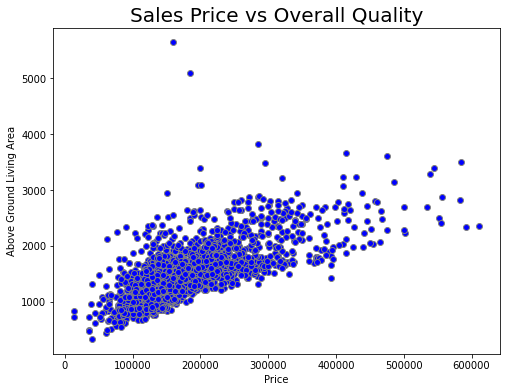

In [48]:
scatter_func(df,'saleprice','gr_liv_area','Sales Price vs Overall Quality','Price','Above Ground Living Area')

**Interpretation**

When we look at a Price vs Above Ground Living Area, we see the outliers that Professor De Cook was talking about.

In [49]:
df['total_sf'] = df['total_bsmt_sf'] + df['gr_liv_area']

In [50]:
df = df[df['total_sf'] <= 4000] 

In [51]:
# Reset index after row removal
reset_index(df)

In [52]:
df.sort_values('gr_liv_area').tail()

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,total_sf
1493,816,90,RL,97.210917,11855,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,2Story,7,5,2000,2000,Hip,CompShg,VinylSd,VinylSd,BrkFace,23.0,TA,TA,PConc,Ex,TA,No,GLQ,820.0,Unf,0.0,348.0,1168.0,GasA,Ex,Y,SBrkr,1168,1619,0,2787,2.0,0.0,4,2,6,2,TA,8,Typ,2,TA,BuiltIn,2000,Fin,4.0,820.0,TA,TA,Y,312,0,0,0,0,0,NA,NA,ANA,0,10,2009,WD,269500,3955.0
903,1420,60,RL,77.539319,9771,Pave,No_Alley,IR3,Lvl,AllPub,Corner,Gtl,SawyerW,Norm,Norm,1Fam,2Story,6,5,1995,2002,Gable,CompShg,HdBoard,HdBoard,BrkFace,190.0,Gd,TA,PConc,Gd,TA,No,LwQ,779.0,Unf,0.0,298.0,1077.0,GasA,Ex,Y,SBrkr,1093,1721,0,2814,0.0,1.0,2,1,4,1,Gd,9,Typ,1,TA,BuiltIn,1995,Fin,2.0,614.0,TA,TA,Y,48,32,0,0,216,0,NA,GdPrv,ANA,0,6,2008,WD,260000,3891.0
120,1183,60,RL,115.216250,24572,Pave,No_Alley,IR1,Lvl,AllPub,CulDSac,Gtl,Veenker,Norm,Norm,1Fam,2Story,9,3,1977,1977,Mansard,CompShg,Wd Sdng,Wd Sdng,BrkFace,1050.0,Gd,Gd,CBlock,Gd,TA,No,GLQ,410.0,Unf,0.0,584.0,994.0,GasA,TA,Y,SBrkr,1599,1345,0,2944,0.0,0.0,2,2,3,1,Gd,9,Typ,1,Gd,Attchd,1977,RFn,3.0,864.0,TA,TA,Y,140,70,16,0,0,0,NA,NA,ANA,0,6,2008,WD,150000,3938.0
1364,910,75,RL,102.000000,15863,Pave,No_Alley,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,2.5Fin,7,3,1920,1970,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,523.0,Unf,0.0,301.0,824.0,GasA,Ex,Y,SBrkr,1687,998,397,3082,1.0,0.0,2,1,5,1,TA,12,Typ,2,TA,Basment,1970,Fin,2.0,672.0,TA,TA,Y,136,63,0,0,0,0,NA,NA,ANA,0,8,2009,WD,197000,3906.0
593,1498,20,RL,123.000000,47007,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,0.0,0.0,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NA,NA,ANA,0,7,2008,WD,284700,3820.0


### Data Engineering

Our EDA continued as we created some new columns: 
- Combining several factors to create a total finished square footage feature
    * This provides a critical contrast to the total square footage we created just above.
- Converting years built categories in to age features, including:
    * Age of Home
        - Accounts for both the year a home was built and the year of the sale.
    * Age of Garage,
        - Accounts for year of the garage was built and the year of the sale.
        - Allows the model to relate that to the Age of Home.
        - Unfortunately, this feature proved to be insignificant.
    * Age of Remodel/Addition 
        - Accounts for not when, but how recently the work was done.
        - Unfortunately, this feature also proved to be insignificant.


In [53]:
# creating column which adds up all finished SF and subtracts low quality finished SF
df['total_fin_sf'] = df['bsmtfin_sf_1'] + df['bsmtfin_sf_2'] + df['1st_flr_sf'] + df['2nd_flr_sf'] - df['low_qual_fin_sf']


To create an Age of Garage feature, we need to first deal with the NA entries that we created above. Since NA for the garage yr blt column is about people who have no garages at all, it seems logical to have these cells give the year home built value since there was no garage added later and we already have other cells that convey that the house has no garage.

In [54]:
# creating list to replace garage yr blt info with Nan's filled in
garage_yr_list = []
for i, item in enumerate(df['garage_yr_blt']):
    if item == 'NA':
        garage_yr_list.append(df['year_built'][i])
    else:
        garage_yr_list.append(df['garage_yr_blt'][i])


In [55]:
# replacing data
df['garage_yr_blt'] = garage_yr_list

In [56]:
# creating columns for age of home at time of sale, age of garage at time of sale 
# and years from Remod/Add to sale - also dropping old columns
df['age_of_home'] = df['yr_sold'] - df['year_built']
df['age_of_garage'] = df['yr_sold'] - df['garage_yr_blt']
df['age_remod/add'] = df['yr_sold'] - df['year_remod/add']
df.drop(columns=['yr_sold','year_built','garage_yr_blt','year_remod/add'], inplace=True)

### Data Distributions

#### Sales Price

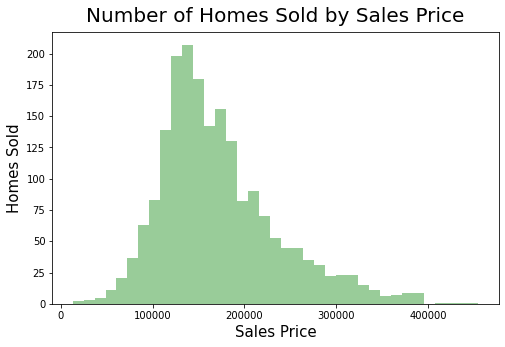

In [57]:
fig = plt.figure(figsize=(8,5))
ax = plt.gca()

sns.distplot(df['saleprice'],
             color='green',
             kde=False)

ax.set_title('Number of Homes Sold by Sales Price', fontsize=20, pad=10)
ax.set_xlabel('Sales Price', fontsize=15)
ax.set_ylabel('Homes Sold', fontsize=15);

**Interpretation**

The Sale Price data has somewhat of a right skew so. In our regression, we will want to look at this data both with and without using the log of this data to see if this can improve our model.

In [58]:
# Creating a column for log of sales price data to look at distribution
df['saleprice_lg'] = np.log(df['saleprice'])

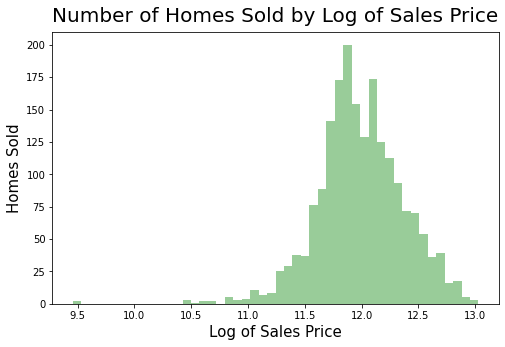

In [59]:
fig = plt.figure(figsize=(8,5))
ax = plt.gca()

sns.distplot(df['saleprice_lg'],
             color='green',
             kde=False)

ax.set_title('Number of Homes Sold by Log of Sales Price', fontsize=20, pad=10)
ax.set_xlabel('Log of Sales Price', fontsize=15)
ax.set_ylabel('Homes Sold', fontsize=15);

**Interpretation**

This distribution looks somewhat better though it seems to have a little left skew. In our modeling, using the logged slaes price did not improve model performance so we used the actual data.

#### Typical X-Feature (Wood Deck Square Footage)

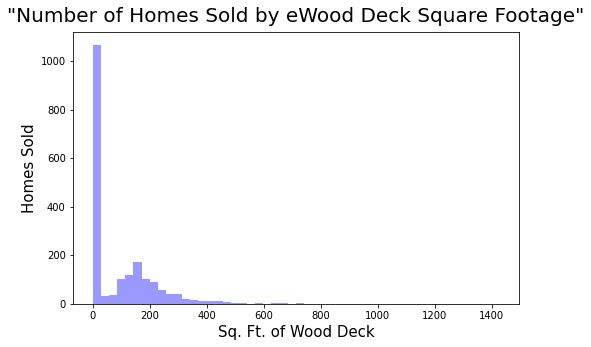

In [60]:
fig = plt.figure(figsize=(8,5))
ax = plt.gca()

sns.distplot(df['wood_deck_sf'],
             color='blue',
             kde=False)

ax.set_title('"Number of Homes Sold by eWood Deck Square Footage"', fontsize=20, pad=10)
ax.set_xlabel('Sq. Ft. of Wood Deck', fontsize=15)
ax.set_ylabel('Homes Sold', fontsize=15);

This is a very common value count graph for this dataset. For each feature (in this case wood decks), there is a large number of homes that don't have the feature, but the distribution of the remaining data is relatively normal.


### Correlation Analysis

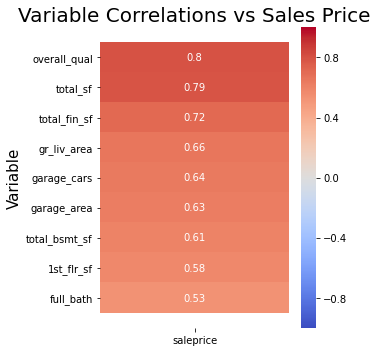

In [61]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()


sns.heatmap(df.corr()[['saleprice']].sort_values('saleprice', ascending=False)[2:11],
            cmap='coolwarm',
            robust=True,
            annot = True,
            fmt='.2g',
            square = False,
            vmin=-1,
            vmax=1)

ax.set_title('Variable Correlations vs Sales Price', fontsize=20)
ax.set_ylabel('Variable', fontsize=15)

fig.tight_layout()

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show(); # ta-da!

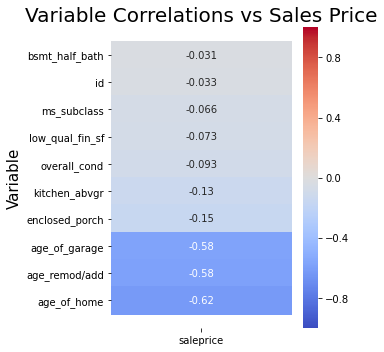

In [62]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()


sns.heatmap(df.corr()[['saleprice']].sort_values('saleprice', ascending=False).tail(10),
            cmap='coolwarm',
            robust=True,
            annot = True,
            fmt='.2g',
            square = False,
            vmin=-1,
            vmax=1)

ax.set_title('Variable Correlations vs Sales Price', fontsize=20)
ax.set_ylabel('Variable', fontsize=15)

fig.tight_layout()

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show(); # ta-da!

This heat map lets us see the correlation of every feature with the sales price, our target variable

- High correlations include:
    * Overall Quality
    * Above Ground Living Area
    * Garage Area
    * Size of Garage by Car
    * Number of Full Bathrooms 
- Low correlations include:
    * Age of Home
    * Age of Remodel/Addition
    * Age of Garage
- Some surprising low-correlation features
    * Month Sold
    * Home Type (i.e. 2-Story) 
    * Partial Sq. Ft. Variables


**Let's look at some sample scatterplots between these features and our target.**

#### Sales Price vs Overall Quality

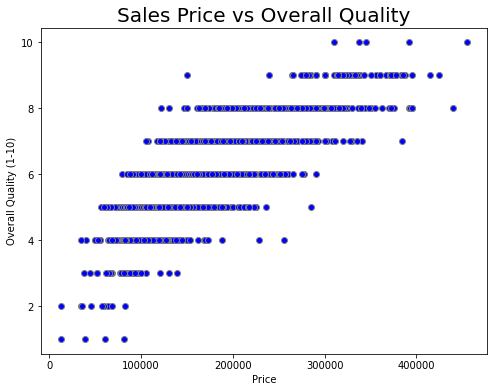

In [63]:
scatter_func(df,'saleprice','overall_qual','Sales Price vs Overall Quality','Price','Overall Quality (1-10)')

**Interpretation**

Despite this variable being tied to the 10 rating scores, this plot clearly demonstrates the powerful correlation between the overall quality score and price.

#### Sales Price vs Above Ground Living Area

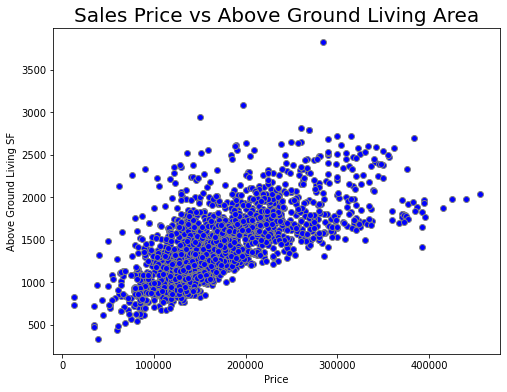

In [64]:
scatter_func(df,'saleprice','gr_liv_area','Sales Price vs Above Ground Living Area','Price','Above Ground Living SF')

**Interpretation**

Above ground living area is our second most correlated variable and we clearly see a strong relationship. Based on this graph, we might argue that there is at least one more outlier data point to remove but we decided to put our trust in Professor De Cook.

#### Sales Price vs Age of Home

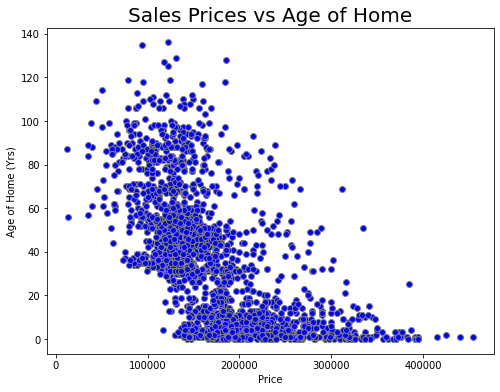

In [65]:
scatter_func(df,'saleprice','age_of_home','Sales Prices vs Age of Home','Price','Age of Home (Yrs)')

**Interpretation**

Our strongest negative correlation with price is with the age of the home which we can see in this scatterplot. 

### Data Engineering II - Dummy Variables & Ordinal Variables

Our dataset includes three types of data.
1. Numeric Data - i.e. Square Footage
    * This data can be used without any change
    * In the case of Sales Price, we will look at logged data based on the distribution
1. Dummy Data - i.e. Dwelling Type (ms_subclass)
    * This is non-numeric data where the possible values cannot be ranked in values
    * For cases where all data values are in both the train and test sets, we will use the get_dummies function
    * For cases where they are not, we will use the special function below to ensure that all values are accounted for
        - Each time the function is run, we create a special string to deal with the values issue
1. Ordinal Data - i.e. Lot Shape
    * This is non-numeric data where the possible values can be ranked in values
    * Below, we used two processes to create these more efficiently:
        - We built a general function which accepts two lists, a list of non-numeric values and a matching list of numeric values that we assigned to each
        - As needed, we then created these lists before calling the function (note that some of the list sets were useable for multiple features)

#### Regular Dummy Data


In [66]:
# Getting dummy columns for columns where all data values are in train and test sets.
df = pd.get_dummies(df, columns=['street',
                                 'alley',
                                 'land_contour',
                                 'lot_config',
                                 'bldg_type',
                                 'house_style',
                                 'roof_style',
                                 'foundation',
                                 'central_air',
                                 'garage_type'
                                ],drop_first=True)

#### Special Dummy Data


In [67]:
# Functionto aid in the process of getting dummies for various columns
# while avoiding issues when looking at test data in Kaggle
def deluxe_dummy(df, column, string):
    temp1 = string.split(',')
    temp2 = []
    for i, item in enumerate(temp1):
        temp2.append(column + '_' + item)
   
    return temp2

In [68]:
# Dictionary of column names and list of values that need to be present
column_values_dict = {'ms_subclass':'120,150,160,180,190,30,40,45,50,60,70,75,80,85,90',
                     'ms_zoning':'C,FV,I,RH,RL,RP,RM',
                     'condition_1':'Feedr,Norm,RRNn,RRAn,PosN,PosA,RRNe,RRAe',
                     'condition_2':'Feedr,Norm,RRNn,RRAn,PosN,PosA,RRNe,RRAe',
                     'roof_matl':'CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl',
                     'exterior_1st':'AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Other,Plywood,PreCast,Stone,Stucco,VinylSd,Wd Sdng,WdShing',
                     'exterior_2nd':'AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Other,Plywood,PreCast,Stone,Stucco,VinylSd,Wd Sdng,WdShing',
                     'mas_vnr_type':'BrkFace,CBlock,None,Stone',
                     'heating':'GasA,GasW,Wall,Grav,OthW',
                     'misc_feature':'Elev,Gar2,Othr,Shed,TenC',
                     'sale_type':'CWD,Con,ConLD,ConLI,ConLw,New,Oth,VWD,WD'}


In [69]:

for key, value in column_values_dict.items():
    df = pd.get_dummies(df, columns=[key],drop_first=True)
    for item in deluxe_dummy(df,key,value):
        if item not in df.columns:
            df[item]=[0 for n in range(0,len(df['lot_area']))]

In [70]:
# special case - Neighborhood (not using function) - 4 steps
# STEP #1 - Create a list of cities (including how they are referenced in data
# and the actual name)
cities = 'Blueste Bluestem,BrDale Briardale,BrkSide Brookside,ClearCr Clear Creek,CollgCr College Creek,Crawfor Crawford,Edwards Edwards,Gilbert Gilbert,GrnHill green,IDOTRR Iowa DOT and Rail Road,Landmrk Landmark,MeadowV Meadow Village,Mitchel Mitchell,NAmes North Ames,NoRidge Northridge,NPkVill Northpark Villa,NridgHt Northridge Heights,NWAmes Northwest Ames,OldTown Old Town,SWISU South & West of Iowa State University,Sawyer Sawyer,SawyerW Sawyer West,Somerst Somerset,StoneBr Stone Brook,Timber Timberland,Veenker Veenker'
city_list = cities.split(',')

In [71]:
# STEP 2 - create new list which includes the column names that
# would be created for each neighborhood
new_city_list = []
for i, item in enumerate(city_list):
    new_city_list.append('neighborhood_' + item.split(' ')[0])


In [72]:
# STEP 3 - perform get_dummies on column
df = pd.get_dummies(df, columns=['neighborhood'],drop_first=True)

In [73]:
# STEP 4 - check to see that all cities were added
for item in new_city_list:
    if item not in df.columns:
        df[item]=[0 for n in range(0,len(df['lot_area']))]

#### Ordinal Data


In [74]:
# Creating function to help convert columns into ordinal columns
def make_ord(df,column,list1,list2):
    temp_list = []
    for item in df[column]:
        for i, element in enumerate(list1):
            if item == element:
                temp_list.append(list2[i])
    df[column] = temp_list

In [75]:
# Lists for Ordinal Conversions
# Lot Shape
ls_code = ['Reg','IR1','IR2','IR3']
ls_num = [3, 2, 1, 0]
# Utility Code 
util_code = ['AllPub','NoSewr','NoSeWa','ELO']
util_num = [5, 2, 1, 0]
# Land Slope
slope_code = ['Gtl','Mod','Sev']
slope_num = [5, 3, 1]
# Excellent to Poor
ex_poor_code = ['Ex','Gd','TA','Fa','Po', 'NA']
ex_poor_num = [5, 4, 3, 2, 1, 0]
# 0-4 rating system
ex_poor_code2 = ['Gd','Av','Mn','No', 'NA']
ex_poor_num2 = [4, 3, 2, 1, 0]
# 0-6 rating system 
ex_poor_code3 = ['GLQ','ALQ','BLQ','Rec', 'LwQ', 'Unf', 'NA']
ex_poor_num3 = [6, 5, 4, 3, 2, 1, 0]
# Type of Electric 
elec_code = ['SBrkr','FuseA','FuseF','FuseP','Mix']
elec_num = [4, 2, 1, 0, 1.5]
# Degree of Home Functionality
functional_code = ['Typ','Min1','Min2','Mod', 'Maj1', 'Maj2', 'Sev', 'Sal']
functional_num = [7, 6, 5, 4, 3, 2, 1, 0]
# Garage Finish
garage_code = ['Fin','RFn','Unf','NA']
garage_num = [3, 2, 1, 0]
# Paved Drive
paving_code = ['Y','P','N']
paving_num = [5, 3, 1]
# Fence Quality 
fence_code = ['GdPrv','GdWo','MnPrv', 'MnWw', 'NA']
fence_num = [4, 3, 2, 1, 0]

ordinal_dict = {'lot_shape':[ls_code,ls_num],
                'utilities':[util_code,util_num],
                'land_slope':[slope_code,slope_num],
                'exter_qual':[ex_poor_code,ex_poor_num],
                'exter_cond':[ex_poor_code,ex_poor_num],
                'bsmt_qual':[ex_poor_code,ex_poor_num],
                'bsmt_cond':[ex_poor_code,ex_poor_num],
                'heating_qc':[ex_poor_code,ex_poor_num],
                'kitchen_qual':[ex_poor_code,ex_poor_num],
                'fireplace_qu':[ex_poor_code,ex_poor_num],
                'garage_qual':[ex_poor_code,ex_poor_num],
                'garage_cond':[ex_poor_code,ex_poor_num],
                'pool_qc':[ex_poor_code,ex_poor_num],
                'bsmt_exposure':[ex_poor_code2,ex_poor_num2],
                'bsmtfin_type_1':[ex_poor_code3,ex_poor_num3],
                'bsmtfin_type_2':[ex_poor_code3,ex_poor_num3],
                'electrical':[elec_code,elec_num],
                'functional':[functional_code,functional_num],
                'garage_finish':[garage_code,garage_num],
                'paved_drive':[paving_code,paving_num],
                'fence':[fence_code,fence_num]}

In [76]:
for key, value in ordinal_dict.items():
    make_ord(df,key,value[0],value[1])

### Feature Significance

To improve our model, we ran a StatsModel Linear Regression to discover which features were the most insignificant.

In [77]:
# Setting up model X, y and performing train-test split

X = df._get_numeric_data().drop(columns=['saleprice','saleprice_lg','id'], axis =1)
y = df[['saleprice']]
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

In [78]:
# fitting model
model = sm.OLS(y_train, X_train).fit()

In [79]:
# calling model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     86.34
Date:                Thu, 16 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:50:24   Log-Likelihood:                -16336.
No. Observations:                1467   AIC:                         3.307e+04
Df Residuals:                    1267   BIC:                         3.413e+04
Df Model:                         199                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.766e+05   5.47e+04     -3.228      0.001   -2.84e+05   -6.93e+04
lot_frontage           -44.4620     35.784     -1.243      0.214    -114.665      25.741
lot_area                 0.5563      0.174      3.193      0.001       0.215       0.898
lot_shape             1436.5738   1113.470      1.290      0.197    -747.873    3621.021
utilities             8293.1614   5691.467      1.457      0.145   -2872.575    1.95e+04
land_slope             112.3533   1446.720      0.078      0.938   -2725.878    2950.585
overall_qual          7454.6210    790.206      9.434      0.000    5904.365    9004.877
overall_cond          4773.4951    671.621      7.107      0.000    3455.884    6091.107
mas_vnr_area            13.6837      5.672      2.412      0.016       2.556      24.811
exter_qual            4286.6166   1678.565      2.554      0.011     993.543    7579.690
exter_cond            -696.6148   1626.019     -0.428      0.668   -3886.600    2493.370
bsmt_qual             3635.1762   1279.056      2.842      0.005    1125.876    6144.476
bsmt_cond            -1780.0517   1569.762     -1.134      0.257   -4859.671    1299.568
bsmt_exposure         3325.4161    669.629      4.966      0.000    2011.712    4639.120
bsmtfin_type_1         220.0533    392.494      0.561      0.575    -549.957     990.064
bsmtfin_sf_1             7.4078      2.478      2.989      0.003       2.546      12.270
bsmtfin_type_2          88.4472    913.251      0.097      0.923   -1703.203    1880.097
bsmtfin_sf_2            -8.1823      3.850     -2.125      0.034     -15.736      -0.629
bsmt_unf_sf             -3.0078      2.734     -1.100      0.272      -8.372       2.356
total_bsmt_sf           -3.7823      2.197     -1.721      0.085      -8.093       0.528
heating_qc             699.4975    729.151      0.959      0.338    -730.979    2129.974
electrical             220.7868    868.894      0.254      0.799   -1483.842    1925.415
1st_flr_sf               8.3319      3.156      2.640      0.008       2.141      14.523
2nd_flr_sf               5.5490      2.806      1.978      0.048       0.044      11.054
low_qual_fin_sf          4.4296      3.914      1.132      0.258      -3.249      12.108
gr_liv_area             18.3105      2.934      6.240      0.000      12.554      24.067
bsmt_full_bath        3807.1835   1477.839      2.576      0.010     907.902    6706.465
bsmt_half_bath        1021.9077   2134.166      0.479      0.632   -3164.981    5208.797
full_bath             2459.1205   1698.303      1.448      0.148    -872.676    5790.917
half_bath              783.7194   1676.604      0.467      0.640   -2505.507    4072.945
bedroom_abvgr        -2571.7387   1059.664     -2.427      0.015   -4650.629    -492.849
kitchen_abvgr        -1.102e+04   5117.676     -2.154    

**Key findings from our StatsModel:**

1. The model has a strong R-Squared value of .939 (essentially matching what we saw on our test score above)
1. The p-values from this model enable us to use hypothesis testing to gauge significance our variables
    - We chose to remove all features with p-values above 0.1 (double the rejection mark of 0.05).
        * Lot Frontage (0.214)
        * Lot Shape (0.197)
        * Utilities (0.145)
        * Land Slope (0.938)
        * Exterior Condition (0.668)
        * Basement Condition (0.257)
        * Basement Finish Type 1 (0.575)
        * Basement Finish Type 2 (0.923)
        * Basement Unfinished Sq. Ft. (0.272)
        * Heating Quality (0.338)
        * Electrical (0.799)
        * Low-Quality Fininshed Sq. Ft. (0.258)
        * Basement Half Bathrooms (0.632)
        * Full Bathooms (0.148)
        * Half Bathrooms (0.640)
        * Fireplaces (0.371)
        * Fireplace Quality (0.233)
        * Garage Finish (0.144)
        * Garage Quality (0.932)
        * Garage Condition (0.289)
        * Driveway Pave Quality (0.496)
        * Wood Deck Sq. Ft. (0.119)
        * Open Porch Sq. Ft. (0.106)
        * Enclosed Porch (0.574)
        * Three Season Porch (0.499)
        * Pool Area (0.488)
        * Pool Quality (0.498)
        * Miscellaneous Value (0.847)
        * Month Sold (0.817)
        * Age of Garage (0.414)
        * Age of Remodel/Addition (0.322)
    - Low p-values only indicate significance in hypothesis testing but the coef numbers for some of these are very small so takes large change to greatly affect price.
    - We also removed dummy features in cases where all features were insignificant. These included the following broad categories:
        * Type of Road Access
        * Alley Access
        * Building Type
        * Foundation Type
        * Central Air
        * Zoning Classification
        * Roofing Material
        * Heating Type
        * Miscellaneous Feature

In [80]:
# Creating set of X features to use in modeling, also removing 
# 'saleprice','saleprice_lg' and 'Id' as these should not be modeled
X_removed = df._get_numeric_data().drop(columns=['saleprice',
                                                 'saleprice_lg',
                                                 'id',
                                                 'lot_shape',
                                                 'lot_frontage',
                                                 'low_qual_fin_sf',
                                                 'exter_cond',
                                                 'utilities',
                                                 'land_slope',
                                                 'bsmt_cond',
                                                 'bsmtfin_type_1',
                                                 'bsmtfin_type_2',
                                                 'bsmt_unf_sf',
                                                 'electrical',
                                                 'heating_qc',
                                                 'bsmt_half_bath',
                                                 'full_bath',
                                                 'half_bath',
                                                 'fireplace_qu',
                                                 'fireplaces',
                                                 'garage_finish',
                                                 'garage_qual',
                                                 'bsmt_cond',
                                                 'paved_drive',
                                                 'open_porch_sf',
                                                 'wood_deck_sf',
                                                 'enclosed_porch',
                                                 '3ssn_porch',
                                                 'pool_area',
                                                 'pool_qc',
                                                 'mo_sold',
                                                 'misc_val',
                                                 'age_of_garage',
                                                 'age_remod/add',
                                                 'street_Pave',
                                                 'alley_No_Alley',
                                                 'alley_Pave',
                                                 'foundation_CBlock',
                                                 'foundation_PConc',
                                                 'foundation_Slab',
                                                 'foundation_Stone',
                                                 'foundation_Wood',
                                                 'bldg_type_2fmCon',
                                                 'bldg_type_Duplex',
                                                 'bldg_type_Twnhs',
                                                 'bldg_type_TwnhsE',
                                                 'central_air_Y',
                                                 'ms_zoning_C',
                                                 'ms_zoning_FV',
                                                 'ms_zoning_I',
                                                 'ms_zoning_RH',
                                                 'ms_zoning_RL',
                                                 'ms_zoning_RM',
                                                 'ms_zoning_RP',
                                                 'roof_matl_Membran',
                                                 'roof_matl_Tar&Grv',
                                                 'roof_matl_WdShake',
                                                 'roof_matl_WdShngl',
                                                 'roof_matl_CompShg',
                                                 'roof_matl_Metal',
                                                 'roof_matl_Roll',
                                                 'heating_GasW',
                                                 'heating_Grav',
                                                 'heating_OthW',
                                                 'heating_Wall',
                                                 'heating_GasA',
                                                 'misc_feature_Gar2',
                                                 'misc_feature_Othr',
                                                 'misc_feature_Shed',
                                                 'misc_feature_Elev',
                                                 'misc_feature_TenC'
                                          ])


## Model Preparation

In [81]:
# setting X and y, using X_removed from above, setting y equal to sales price and
# y2 equal to logged sales price
X = X_removed
y = df['saleprice']
y2 = df['saleprice_lg']


In [82]:
# running train-test split although we will also do that within functions below
# to simplify function inputs
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, random_state=RANDOM_STATE)

## Modeling

### Baseline Model



#### - Manual Method
We started by creating a baseline model, where we predicted the mean sales price for every prediction and then ran our scoring metrics.

In [83]:
# This mean will be our prediction for each point in both the train score and the test score
y_train.mean()

171143.2931152011

In [84]:
# using train mean for all train values
y_hat_train = [y_train.mean() for n in range(0,len(y_train))]

In [85]:
# using train mean for all test values
y_hat_test = [y_train.mean() for n in range(0,len(y_test))]

In [86]:
# Train R2 Score
r2_score(y_train,y_hat_train)

0.0

In [87]:
# Test R2 Score
r2_score(y_test,y_hat_test)

-0.005389433047184644

In [88]:
#Train RMSE
mean_squared_error(y_train,y_hat_train, squared=False)

63331.738357399576

In [89]:
#Test RMSE
mean_squared_error(y_test,y_hat_test, squared=False)

69234.9117511919

**Interpretation**

The R-squared score for our baseline model is actually slightly negative so it is probable that we will far exceed the baseline. At this point, we weren't sure how good the RMSE scores are.

#### - Confirmed R2 scores using Dummy Regressor method.

In [90]:
dummy = DummyRegressor()

dummy.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [91]:
dummy.score(X_train,y_train)

0.0

In [92]:
dummy.score(X_test, y_test)

-0.005389433047184644


### Linear Regression

In [93]:
# Building function to do linear regression and return Train Score, Test Score 
# and Cross-Value Score for both R2 and RMSE
def df_regress_lr(df,X,y,r_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=r_state)

# instantiate
    lr = LinearRegression()
# fit
    lr.fit(X_train, y_train)
    
    y_preds_train = lr.predict(X_train)
    y_preds_test = lr.predict(X_test)
    
    print('train: ' + str(lr.score(X_train,y_train))) #training score)}
    print('test: ' + str(lr.score(X_test,y_test))) #testing score)}
    print('cross_val: ' + str(cross_val_score(lr, X, y, cv=5).mean())) #cv score)}
    print('train RMSE: ' + str(mean_squared_error(y_train, y_preds_train,squared=False))) #training score)}
    print('test RMSE: ' + str(mean_squared_error(y_test, y_preds_test,squared=False))) #test score)}
    print('cross_val: ' + str(cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error',cv=5).mean())) #cv score)}


In [94]:
df_regress_lr(df, X,y,RANDOM_STATE)

train: 0.9257845512859783
test: 0.8889553277537461
cross_val: 0.9007146549442453
train RMSE: 17253.156736477493
test RMSE: 23009.48233692604
cross_val: -20341.277350310258


**Interpretation**

1. These R2 scores suggest that we have a fairly good model but with some variance. 
1. Our RMSE scores are about 1/3 of those from the Dummy model so we have a vast improvement from there.

#### Log Transformed Regression

Before we looked at other regression models to try to trade bias for variance, we first ran the model using the logged target.

In [95]:
df_regress_lr(df, X,y2,RANDOM_STATE)

train: 0.9299104905798627
test: 0.8476835380734119
cross_val: 0.889369011672074
train RMSE: 0.09803999080672594
test RMSE: 0.158200463623105
cross_val: -0.12564685958939642


**Interpretation**

Our train R2 score was slightly higher (0.4%) using the log of the sales price but we saw a major decrease on our test score (4.2%). Before moving forward using the non-logged data, we needed to exponentiate our numbers and look at the corrected RMSE scores to make sure that the log converted numbers are not better.

Based on a post we found on Stack Exchange, it appears that our prediction numbers would be biased if we simply exponentiated them so we need to include a bias correction term in our calculations.

In [96]:
# defining function to calculate RMSE for Train and Test scores with logged target
def rmse_unbias(y_set, y_hat_set):
    func_df = pd.DataFrame()
    func_df['y'] = y_set
    func_df['y_hat'] = y_hat_set
# We unbias our data by adding the variance divided by 2 to each number 
# before exponentiating.
    func_df['y_hat_bias_correction'] = [num + (func_df['y_hat'].var()/2) for num in func_df['y_hat']]
    func_df['y_exp'] = np.exp(func_df['y'])
    func_df['y_hat_exp'] = np.exp(func_df['y_hat_bias_correction'])
    func_df['y-y_squared'] = (func_df['y_exp'] - func_df['y_hat_exp'])**2
    return (func_df['y-y_squared'].sum()/len(func_df['y-y_squared']))**.5


In [97]:
# The we tweaked our function to return exponentiated RMSE scores  
# using our unbiased method
def df_regress_log_lr(df,X,y,r_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=r_state)

# instantiate
    lr = LinearRegression()
# fit
    lr.fit(X_train, y_train)
    
    y_preds_train = lr.predict(X_train)
    y_preds_test = lr.predict(X_test)
    
    return [rmse_unbias(y_train, y_preds_train),rmse_unbias(y_test, y_preds_test)]


In [98]:
df_regress_log_lr(df, X,y2,RANDOM_STATE)

[19502.814198046206, 22837.202548655616]

**Interpretation**

Our train RMSE score was 13% worse using the log transformed data while our test RMSE score only gained 0.8%. Based on these numbers, we will use our non-logged scores moving forward. 

**Below, we revised our function to return just our Train, Test and Cross-Val scores**

In [99]:
# Building function to do linear regression and return Train Score, Test Score and Cross-Value Score
def df_regress_lr_output(df,X,y,r_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=r_state)

# instantiate
    lr = LinearRegression()
# fit
    lr.fit(X_train, y_train)
    
    y_preds_train = lr.predict(X_train)
    y_preds_test = lr.predict(X_test)
    
    return [mean_squared_error(y_train, y_preds_train,squared=False),
            mean_squared_error(y_test, y_preds_test,squared=False),
            (-1 * cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error',cv=5).mean())]

In [100]:
df_regress_lr_output(df,X,y, RANDOM_STATE)

[17253.156736477493, 23009.48233692604, 20341.277350310258]

### Ridge Regression

We wouldn't typically use regularization techniques like Ridge Regression with variance as low as we are seeing in our Linear Regression numbers but we wanted to see if we could improve on our scores.

In [101]:
# Creating a function to run the Ridge model (based on the one seen in GA class)
def df_ridge(df,X,y,r_state):
    X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.7,
    random_state=r_state
    )
    # Scale our data.
# Relabeling scaled data as "Z" is common.
    sc = StandardScaler()
    Z_train = sc.fit_transform(X_train)
    Z_test = sc.transform(X_test)
# instantiate
    r_alphas = np.logspace(0, 3, 100)

# Cross-validate over our list of ridge alphas to find the best alpha
    ridge_cv = RidgeCV(
        alphas = r_alphas,
        scoring='neg_root_mean_squared_error',
        cv=5)
    ridge_cv.fit(Z_train, y_train)
# Use that alpha to set up the model
    ridge = Ridge(ridge_cv.alpha_)
# Fit.
    ridge.fit(Z_train, y_train)
    # Evaluate model using R2.

    y_preds_train = ridge.predict(Z_train)
    y_preds_test  = ridge.predict(Z_test)

    return [mean_squared_error(y_train, y_preds_train,squared=False),
            mean_squared_error(y_test, y_preds_test,squared=False),
            (-1 * cross_val_score(ridge, X, y, scoring='neg_root_mean_squared_error',cv=5).mean())]

In [102]:
df_ridge(df,X,y,RANDOM_STATE)

[18229.048636478903, 21067.536015571808, 21477.444321561215]

**Interpretation**

Comparing the Ridge Regression RMSE scores to those for the Linear Regression, we saw the train score get worse by 5.7% and the test score go improved by 8.4%. This seems to be a good trade-off of bias for variance.

### LASSO Regression

In [103]:
# Creating a function to run the LASSO model (based on the one seen in GA class)
def df_lasso(df,X,y,r_state):
    X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.7,
    random_state=r_state
    )
    # Scale our data.
# Relabeling scaled data as "Z" is common.
    sc = StandardScaler()
    Z_train = sc.fit_transform(X_train)
    Z_test = sc.transform(X_test)
# instantiate
# Set up a list of Lasso alphas to check.
    l_alphas = np.logspace(1, 4, 100)
# Cross-validate over our list of Lasso alphas.
    lasso_cv = LassoCV(
        alphas=l_alphas,
        cv=5
    )
# Fit model using best lasso alpha!
    lasso_cv.fit(Z_train, y_train)

# Use that alpha to set up the model
    lasso = Lasso(lasso_cv.alpha_)
# Fit.
    lasso.fit(Z_train, y_train)
    # Evaluate model using R2.
    
    y_preds_train = lasso.predict(Z_train)
    y_preds_test  = lasso.predict(Z_test)
    
    return [mean_squared_error(y_train, y_preds_train,squared=False),
            mean_squared_error(y_test, y_preds_test,squared=False),
            (-1 * cross_val_score(lasso, X, y, scoring='neg_root_mean_squared_error',cv=5).mean())]

In [104]:
# testing function
df_lasso(df,X,y,RANDOM_STATE)

[18519.22679327856, 21260.11772332566, 22889.319601224903]

**Interpretation**

The LASSO Regression also reduced variance with the train score getting worse by 7.3% and the test score go improved by 7.6%.

## Model Selection

In [105]:
# Creating a function to return train and test scores for all three models in one spot
def all_scores(df,X,y,r_state):
    print('Linear Regression train score: ' + str(df_regress_lr_output(df,X,y,r_state)[0]))
    print('Linear Regression test score: ' + str(df_regress_lr_output(df,X,y,r_state)[1]))
    print('Linear Regression CV score: ' + str(df_regress_lr_output(df,X,y,r_state)[2]))
    print('Ridge Regression train score: ' + str(df_ridge(df,X,y,r_state)[0]))
    print('Ridge Regression test score: ' + str(df_ridge(df,X,y,r_state)[1]))
    print('Ridge Regression CV score: ' + str(df_ridge(df,X,y,r_state)[2]))
    print('LASSO Regression train score: ' + str(df_lasso(df,X,y,r_state)[0]))
    print('LASSO Regression test score: ' + str(df_lasso(df,X,y,r_state)[1]))
    print('LASSO Regression CV score: ' + str(df_lasso(df,X,y,r_state)[2]))

In [106]:
# Calling function above
all_scores(df,X,y,RANDOM_STATE)

Linear Regression train score: 17253.156736477493
Linear Regression test score: 23009.48233692604
Linear Regression CV score: 20341.277350310258
Ridge Regression train score: 18229.048636478903
Ridge Regression test score: 21067.536015571808
Ridge Regression CV score: 21477.444321561215
LASSO Regression train score: 18519.22679327856
LASSO Regression test score: 21260.11772332566
LASSO Regression CV score: 22889.319601224903


The key observations on the numbers above: 
1. The Linear Regression model has the best train and CV scores of the three models but the highest test score.
1. The Ridge Regression model and the LASSO Regression model scores were fairly close to Linear Regression scores but the variance for each is way lower.
1. Given that all three Ridge scores are better than the LASSO scores, we selected this as our predictive model.


## Model Evaluation

To evaluate our final model, we did the following:
 
1. Created a new DataFrame with columns for feature and coefficients to find the features with the most and least influence on our model.
    * The coefficient represents the dollar value for an incremental change in the feature.
        - For continuous data, the increment is tied to a unit of measure (i.e. for each square foot).
        - For ordinal data, the increment is tied to ratings units (i.e. the value of moving from a 5 quality rating to a 6).
        - For dummy data, the increment is tied to the specific feature being true (i.e. house's lot configuration is a Cul De Sac).
1. Performed residual analysis on our test data to test our underlying assumptions.
1. Ran a simulation on raw data to see how accurate our model is.
1. Ran test R2 score on Ridge Regression.

### Coefficient Analysis

In [107]:
# Rerunning ridge model as we cannot access information from the function.
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)
# instantiate
r_alphas = np.logspace(0, 3, 100)

# Cross-validate over our list of ridge alphas to find the best alpha
ridge_cv = RidgeCV(
    alphas = r_alphas,
    scoring='neg_root_mean_squared_error',
    cv=5)
ridge_cv.fit(Z_train, y_train)
# Use that alpha to set up the model
ridge = Ridge(ridge_cv.alpha_)
# Fit.
ridge.fit(Z_train, y_train)
# Evaluate model using R2.

df_coef = pd.DataFrame()
df_coef['feature'] = X.columns
df_coef['coef'] = ridge.coef_

In [108]:
df_coef.sort_values('coef')[47:82]

,feature,coef
38,house_style_2Story,-186.893829
87,exterior_1st_CemntBd,-181.617392
138,neighborhood_Gilbert,-180.183828
139,neighborhood_Greens,-172.917751
73,condition_1_RRNe,-130.166660
107,exterior_2nd_Plywood,-120.545508
37,house_style_2.5Unf,-117.747427
53,ms_subclass_40,-87.458493
34,house_style_1.5Unf,-86.526315
111,exterior_2nd_Wd Sdng,-80.089265


**Interpretation**

Looking at the features that drove the price less than \$200 in either direction, there are really no major surprises and each of these features is a dummy column.

In [109]:
# Grouping top positive and negative movers
df_coef_neg = df_coef.sort_values('coef').head(15)
df_coef_pos = df_coef.sort_values('coef',ascending=False).head(15)

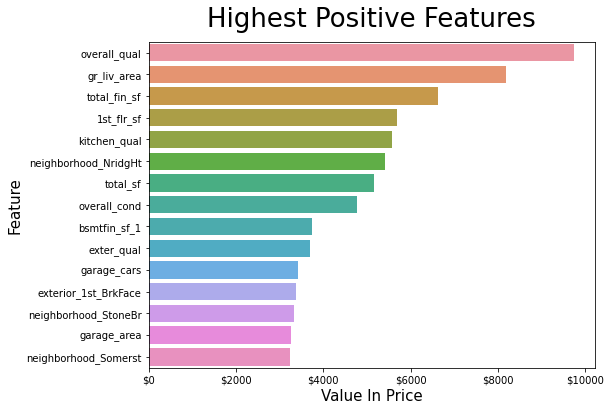

In [110]:
# Plotting biggest positive movers
plt.figure(figsize=(8,6))
plt.title('Highest Positive Features',fontsize=26, pad = 15)

# plotting prices x score
ax1 = sns.barplot(x= 'coef',y='feature',data=df_coef_pos, orient='h')

formatter = ticker.FormatStrFormatter('$%.0f')
ax1.xaxis.set_major_formatter(formatter)

ax1.set_xlabel('Value In Price', fontsize=15)
ax1.set_ylabel('Feature', fontsize=15);

**Interpretation**

- It was no surprise that the biggest positive movers were mainly related to:
    * Quality
    * Square Footage
    * Neighborhood
    * Basement Finishing
- Size of the garage is probably related to size of the house so that makes sense as well.
- We found it interesting that Brick facing was so valuable (\$3,385).
    * No other exterior 1 option was worth more than $518.

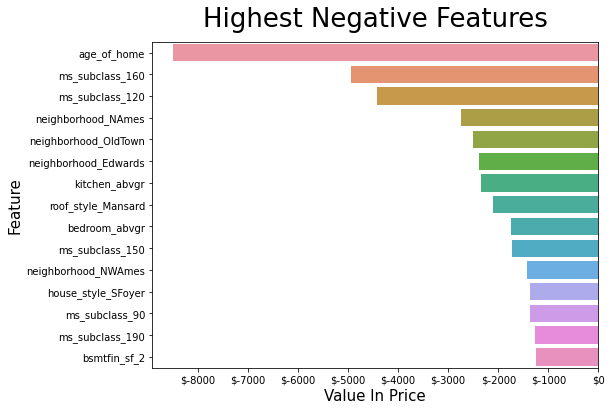

In [111]:
plt.figure(figsize=(8,6))
plt.title('Highest Negative Features',fontsize=26, pad = 15)

# plotting prices x score
ax1 = sns.barplot(x= 'coef',y='feature',data=df_coef_neg, orient='h')

formatter = ticker.FormatStrFormatter('$%.0f')
ax1.xaxis.set_major_formatter(formatter)

ax1.set_xlabel('Value In Price', fontsize=15)
ax1.set_ylabel('Feature', fontsize=15);

**Interpretation**

- The biggest negative movers were also not very surprising, including:
    * Age of Home
    * Various Neighborhoods
    * Planned Unit Development (lower income housing)
- It was interesting that the number of bedrooms ahd kitchens had a net negative effect.
- We also found it interesting that certain roof styles and house styles were negative drivers. 
    * It would be fascinating to know if these preferences have changed over time as styles tend to go in and out of popularity.

### Residual Analysis

To analyze our residuals, we made three different visualizations to test if we are satisfying the assumptions of Simple Linear Regression.

#### Predicted Values vs. Actual Values

In [112]:
# Building a DataFrame with y_test values, predictions and residuals
df_residuals = pd.DataFrame()
df_residuals['y_test'] = y_test
df_residuals['y_pred'] = ridge.predict(Z_test)
df_residuals['residual'] = df_residuals['y_test'] - df_residuals['y_pred']

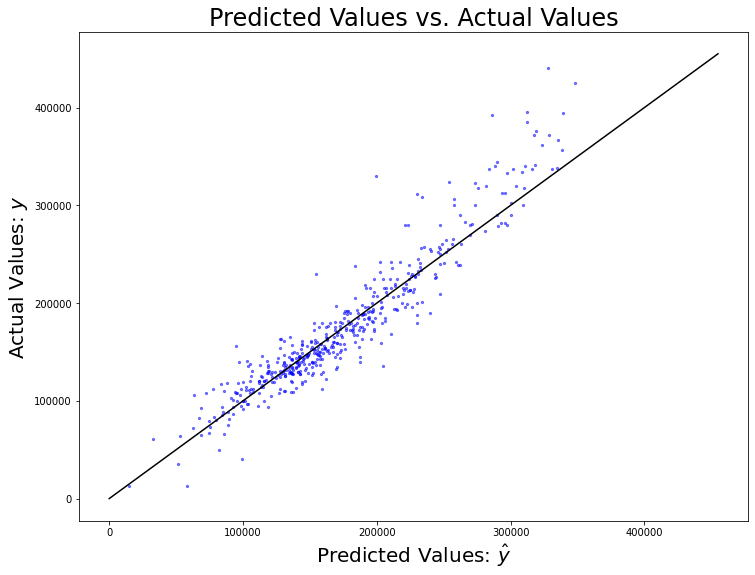

In [113]:
# And then we can use the y_preds output to plot residuals vs y
# taken from GA Linear Regression session
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter('y_pred', 'y_test', data=df_residuals, s=5, color='blue', alpha = 0.5)

# Plot a line.
plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'black')

# plt.xlim((10, 14))
# plt.ylim((10, 14))

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

**Interpretation**

This first graph suggests that our model is close to satisfying the first assumption of Simple Linear Regression and that we have linearity. However, the residuals for the more expensive homes show us that we have room for improvement.

#### Residuals Plot

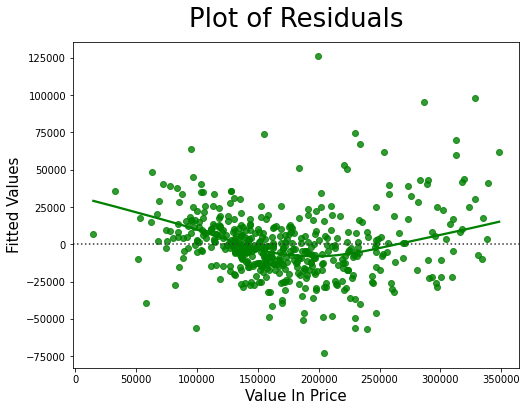

In [114]:
# Plotting Residuals
plt.figure(figsize=(8,6))
plt.title('Plot of Residuals',fontsize=26, pad = 15)

# plotting prices x score
ax1 = sns.residplot('y_pred', 'residual', data= df_residuals, lowess=True, color="g")

ax1.set_xlabel('Value In Price', fontsize=15)
ax1.set_ylabel('Fitted Values', fontsize=15);

**Interpretation**

This second graph suggest that our model has some problems with independence of the variances (rule 2) and/or with independence of predictors (rule 4). If we were to tweak this model further, we would certainly want to look at correlations between the various X variables. For instance, we would want to make sure to eliminate variables that are accounting for the same square footage in the homes.

#### Residuals Histogram

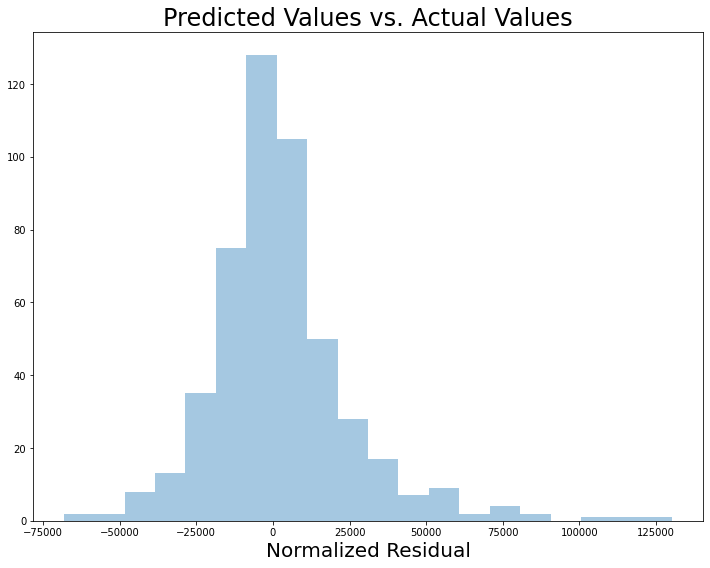

In [115]:
# And then we can use the y_preds output to plot residuals vs y
# taken from GA Linear Regression session
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
sns.distplot(df_residuals['residual'], bins = 20, kde=False);

# Tweak title and axis labels.
plt.xlabel("Normalized Residual", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

**Interpretation**

This final residual plot suggests that our residuals are normally distributed, satisfying the third rule.

### Testing Additional Data

In [116]:
val = pd.read_csv('../datasets/test.csv')
# called train.csv but it our dataset

In [117]:
# Convert all columns to lowercase and replace spaces in column names with underscores.
val.columns = val.columns.str.lower().str.replace(' ', '_')

In [118]:
# Checking for duplicated columns - None found
val[val.duplicated()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type


In [119]:
# For MS Zoning, changing those entries to just read C, A and I in the data. 
for i, item in enumerate(val['ms_zoning']):
    if item == 'C (all)':
        val['ms_zoning'][i] = 'C'
    elif item == 'A (agr)':
        val['ms_zoning'][i] = 'A'
    elif item == 'I (all)':
        val['ms_zoning'][i] = 'I'


### Missing Values

In [120]:
# Checking for Missing Values
val.isnull().sum()

id                   0
pid                  0
ms_subclass          0
ms_zoning            0
lot_frontage       160
lot_area             0
street               0
alley              820
lot_shape            0
land_contour         0
utilities            0
lot_config           0
land_slope           0
neighborhood         0
condition_1          0
condition_2          0
bldg_type            0
house_style          0
overall_qual         0
overall_cond         0
year_built           0
year_remod/add       0
roof_style           0
roof_matl            0
exterior_1st         0
exterior_2nd         0
mas_vnr_type         1
mas_vnr_area         1
exter_qual           0
exter_cond           0
foundation           0
bsmt_qual           25
bsmt_cond           25
bsmt_exposure       25
bsmtfin_type_1      25
bsmtfin_sf_1         0
bsmtfin_type_2      25
bsmtfin_sf_2         0
bsmt_unf_sf          0
total_bsmt_sf        0
heating              0
heating_qc           0
central_air          0
electrical 

In [121]:
# Creating temporary column
val['lot_frontage/lot_area'] = val['lot_frontage'] / val['lot_area']

In [122]:
# Creating a dictionary of lot shape/config combinations and the
# mean lot frontage/area for each

lot_frontage_dict2 = {}
for shape in val['lot_shape'].unique():
    for config in val['lot_config'].unique():
        lshape = val['lot_shape'] == shape
        lconfig = val['lot_config'] == config
        lot_frontage_dict2[(shape,config)] = val.groupby([lshape,lconfig])['lot_frontage/lot_area'].mean()



In [123]:
# Building a list of frontages with current values and, for Nan's, filling in with 
# the lot area times the mean figure for that row's shape/config combination
lot_frontage_list = []
for i, item in enumerate(val['lot_frontage']):
    if item > 0:
        lot_frontage_list.append(item)
    else:
        new_item = val['lot_area'][i] * lot_frontage_dict2[(val['lot_shape'][i],val['lot_config'][i])][True][True]
        lot_frontage_list.append(new_item)

In [124]:
# Replacing Lot Frontage with the elements from the list
val['lot_frontage'] = lot_frontage_list

In [125]:
# Dropping engineered column as no longer needed
val.drop(columns='lot_frontage/lot_area', inplace=True)

In [126]:
for key, value in nan_fill_dict1.items():
    nan_filler(val, key, value)

In [127]:
for key, value in nan_fill_dict2.items():
    nan_filler(val, key, value)

In [128]:
for key, value in nan_fill_dict3.items():
    nan_filler(val, key, value)

In [129]:
for key, value in nan_fill_dict4.items():
    nan_filler(val, key, value)

In [130]:
# fixing all WD entries in the column as they include an extra space
val['sale_type'] = ['WD' if item == 'WD ' else item for item in val['sale_type']]

In [131]:
# Found NaN value in Electrical
val.isnull().sum()

id                 0
pid                0
ms_subclass        0
ms_zoning          0
lot_frontage       0
lot_area           0
street             0
alley              0
lot_shape          0
land_contour       0
utilities          0
lot_config         0
land_slope         0
neighborhood       0
condition_1        0
condition_2        0
bldg_type          0
house_style        0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
roof_style         0
roof_matl          0
exterior_1st       0
exterior_2nd       0
mas_vnr_type       0
mas_vnr_area       0
exter_qual         0
exter_cond         0
foundation         0
bsmt_qual          0
bsmt_cond          0
bsmt_exposure      0
bsmtfin_type_1     0
bsmtfin_sf_1       0
bsmtfin_type_2     0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
heating            0
heating_qc         0
central_air        0
electrical         1
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area  

In [132]:
val['electrical'].value_counts()

SBrkr    813
FuseA     48
FuseF     15
FuseP      1
Name: electrical, dtype: int64

In [133]:
nan_fill_dict5 = {'electrical':'Mix'}

In [134]:
for key, value in nan_fill_dict5.items():
    nan_filler(val, key, value)

In [135]:
# removing pid column as it serves no purpose in our study
val.drop(columns='pid', inplace=True)

In [136]:
val['total_sf'] = val['total_bsmt_sf'] + val['gr_liv_area']

In [137]:
# creating column which adds up all finished SF and subtracts low quality finished SF
val['total_fin_sf'] = val['bsmtfin_sf_1'] + val['bsmtfin_sf_2'] + val['1st_flr_sf'] + val['2nd_flr_sf'] - val['low_qual_fin_sf']


In [138]:
# creating list to replace garage yr blt info with Nan's filled in
garage_yr_list = []
for i, item in enumerate(val['garage_yr_blt']):
    if item == 'NA':
        garage_yr_list.append(val['year_built'][i])
    else:
        garage_yr_list.append(val['garage_yr_blt'][i])


In [139]:
# replacing data
val['garage_yr_blt'] = garage_yr_list

In [140]:
# creating columns for age of home at time of sale, age of garage at time of sale 
# and years from Remod/Add to sale - also dropping old columns
val['age_of_home'] = val['yr_sold'] - val['year_built']
val['age_of_garage'] = val['yr_sold'] - val['garage_yr_blt']
val['age_remod/add'] = val['yr_sold'] - val['year_remod/add']
val.drop(columns=['yr_sold','year_built','garage_yr_blt','year_remod/add'], inplace=True)

In [141]:
# Getting dummy columns for columns where all data values are in train and test sets.
val = pd.get_dummies(val, columns=['street',
                                 'alley',
                                 'land_contour',
                                 'lot_config',
                                 'bldg_type',
                                 'house_style',
                                 'roof_style',
                                 'foundation',
                                 'central_air',
                                 'garage_type'
                                ],drop_first=True)

In [142]:

for key, value in column_values_dict.items():
    val = pd.get_dummies(val, columns=[key],drop_first=True)
    for item in deluxe_dummy(val,key,value):
        if item not in val.columns:
            val[item]=[0 for n in range(0,len(val['lot_area']))]

In [143]:
# STEP 3 - perform get_dummies on column
val = pd.get_dummies(val, columns=['neighborhood'],drop_first=True)

In [144]:
# STEP 4 - check to see that all cities were added
for item in new_city_list:
    if item not in val.columns:
        val[item]=[0 for n in range(0,len(val['lot_area']))]

In [145]:
for key, value in ordinal_dict.items():
    make_ord(val,key,value[0],value[1])

In [146]:
column_list = list(df.columns.values)
val = val.reindex(columns=column_list)

In [147]:
#filter features
filtered_val = val._get_numeric_data()

In [148]:
val2 = val.copy()

In [149]:
# Creating set of X features to use in modeling, also removing 
# 'saleprice','saleprice_lg' and 'Id' as these should not be modeled
val.drop(columns=['id',
                          'saleprice',
                          'saleprice_lg',
                             'lot_shape',
                             'lot_frontage',
                             'low_qual_fin_sf',
                             'exter_cond',
                             'utilities',
                             'land_slope',
                             'bsmt_cond',
                             'bsmtfin_type_1',
                             'bsmtfin_type_2',
                             'bsmt_unf_sf',
                             'electrical',
                             'heating_qc',
                             'bsmt_half_bath',
                             'full_bath',
                             'half_bath',
                             'fireplace_qu',
                             'fireplaces',
                             'garage_finish',
                             'garage_qual',
                             'bsmt_cond',
                             'paved_drive',
                             'open_porch_sf',
                             'wood_deck_sf',
                             'enclosed_porch',
                             '3ssn_porch',
                             'pool_area',
                             'pool_qc',
                             'mo_sold',
                             'misc_val',
                             'age_of_garage',
                             'age_remod/add',
                             'street_Pave',
                             'alley_No_Alley',
                             'alley_Pave',
                             'foundation_CBlock',
                             'foundation_PConc',
                             'foundation_Slab',
                             'foundation_Stone',
                             'foundation_Wood',
                             'bldg_type_2fmCon',
                             'bldg_type_Duplex',
                             'bldg_type_Twnhs',
                             'bldg_type_TwnhsE',
                             'central_air_Y',
                             'ms_zoning_C',
                             'ms_zoning_FV',
                             'ms_zoning_I',
                             'ms_zoning_RH',
                             'ms_zoning_RL',
                             'ms_zoning_RM',
                             'ms_zoning_RP',
                             'roof_matl_Membran',
                             'roof_matl_Tar&Grv',
                             'roof_matl_WdShake',
                             'roof_matl_WdShngl',
                             'roof_matl_CompShg',
                             'roof_matl_Metal',
                             'roof_matl_Roll',
                             'heating_GasW',
                             'heating_Grav',
                             'heating_OthW',
                             'heating_Wall',
                             'heating_GasA',
                             'misc_feature_Gar2',
                             'misc_feature_Othr',
                             'misc_feature_Shed',
                             'misc_feature_Elev',
                             'misc_feature_TenC'
                                          ], inplace=True)


In [150]:
val.isnull().sum()

lot_area                0
overall_qual            0
overall_cond            0
mas_vnr_area            0
exter_qual              0
bsmt_qual               0
bsmt_exposure           0
bsmtfin_sf_1            0
bsmtfin_sf_2            0
total_bsmt_sf           0
1st_flr_sf              0
2nd_flr_sf              0
gr_liv_area             0
bsmt_full_bath          0
bedroom_abvgr           0
kitchen_abvgr           0
kitchen_qual            0
totrms_abvgrd           0
functional              0
garage_cars             0
garage_area             0
garage_cond             0
screen_porch            0
fence                   0
total_sf                0
total_fin_sf            0
age_of_home             0
land_contour_HLS        0
land_contour_Low        0
land_contour_Lvl        0
lot_config_CulDSac      0
lot_config_FR2          0
lot_config_FR3          0
lot_config_Inside       0
house_style_1.5Unf      0
house_style_1Story      0
house_style_2.5Fin      0
house_style_2.5Unf      0
house_style_

In [151]:
val_sc = sc.transform(val)

In [152]:
preds = ridge.predict(val_sc)

In [153]:
preds[:10]

array([119460.46556611, 165026.92534447, 213258.83103289, 110213.0922587 ,
       173274.77755257,  84406.99839684, 104112.48436105, 154723.7154385 ,
       179611.69879456, 159401.37259266])

In [155]:
# We need to submit to Kaggle in the appropriate form of .csv
# create prediction Series
preds_col = pd.Series(preds, name = "SalePrice")
# combine with Id
id_col    = val2["id"]
output = pd.concat([id_col, preds_col], axis = 1)
output.head()

,id,SalePrice
0,2658,119460.465566
1,2718,165026.925344
2,2414,213258.831033
3,1989,110213.092259
4,625,173274.777553


In [156]:
#write to csv
output.to_csv('../output/submission.csv', index = False)

**Interpretation**

This data was submitted to a competition on Kaggle and placed 26th (out of 89) in a leaderboard of General Assembly students. While there is obviously a lot of room for improvement, this model is well certainly a better than average predictor of housing prices in Ames.

### Ridge R-Squared Test Score

In [159]:
ridge.score(Z_test,y_test)

0.889080826877584

**Interpretation**

This score tells us that our model explains 89% of the variance in housing pricing.

## Conclusion

Regression helps us to see if our data can accurately predict outcomes and, in this case, we can say that our model explains nearly 89% of the variation in home prices in the Ames area. Now that we know that we have a solid model, there is much here to be mined for our members. A few sample learnings include:

- Lot area is a significant feature but not it’s shape, slope or street frontage. 
- The area, as one would expect, is also a truly dominant feature in terms of price, with each additional square foot  being worth \$2,075.
- Most decks and porches are not significant factors but a screened porch is valuable (\$2,266).

## Recommendations

The Ames Chamber of Commerce is made up of small and medium sized business owners who look to us for advice on their businesses and their personal/financial well-being.

Nearly 800 homes are sold in Ames each year and our members (and their employees) are:
- Buyers
- Sellers

We recommended the following tactics:
- We would like to use this data to create a member-exclusive online resource which can be accessed for smart buying and selling.
- A tool can be created which would take data inputs and return an expected price.
- Sample data can be used to create posts, blogs and emails to drive member awareness of this resource and drive additional membership as well.



## References

- http://jse.amstat.org/v19n3/decock/DataDocumentation.txt
- http://jse.amstat.org/v19n3/decock.pdf
- https://stats.stackexchange.com/questions/414499/should-i-convert-the-number-after-log-transformation-back-to-the-original-for-ca
- https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge